In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# unzip
import zipfile
import os
# 
path = 'Data/'

In [2]:
# Authenticating With API Server
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
# !kaggle datasets list -s "Fake Job Description Prediction"
!kaggle datasets list -s "IBM HR Analytics Employee Attrition & Performance"

ref                                                      title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -------------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
pavansubhasht/ibm-hr-analytics-attrition-dataset         IBM HR Analytics Employee Attrition & Performance  50KB  2017-03-31 06:55:16          94483       1835  0.88235295       
uniabhi/ibm-hr-analytics-employee-attrition-performance  IBM HR Analytics Employee Attrition & Performance  50KB  2021-09-08 20:18:29            416         15  0.7058824        
ahmdel/ibm-hr-analytics-employee-attrition-performance   IBM HR Analytics Employee Attrition & Performance  50KB  2018-01-07 08:24:38            469          9  0.29411766       


In [4]:
!kaggle datasets download -d "pavansubhasht/ibm-hr-analytics-attrition-dataset"
!mv *.zip Data/
filename = !ls Data/*.zip

  0%|                                               | 0.00/50.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 50.1k/50.1k [00:00<00:00, 1.16MB/s]


In [5]:
# Unzip
with zipfile.ZipFile(filename[0], mode='r') as unzipit:
    unzipit.extractall(path=path)
# Delete ZIP file
os.remove(filename[0])

In [6]:
!ls -al Data/*.csv

-rw-r--r--@ 1 sir  staff       7813 Aug  2  2021 Data/2671067.csv
-rw-rw-r--@ 1 sir  staff  493534783 Sep 20  2019 Data/PS_20174392719_1491204439457_log_.csv
-rw-r--r--  1 sir  staff     227977 Mar  9 12:51 Data/WA_Fn-UseC_-HR-Employee-Attrition.csv
-rw-r--r--@ 1 sir  staff      96295 Mar 31  2020 Data/distance_dataset.csv
-rw-rw-r--@ 1 sir  staff  238803811 Sep 21  2019 Data/training.1600000.processed.noemoticon.csv
-rw-r--r--@ 1 sir  staff      21687 Dec 10 14:52 Data/world-happiness-report-2021.csv
-rw-r--r--  1 sir  staff     137100 Dec 10 14:52 Data/world-happiness-report.csv


In [7]:
csv = !ls Data/WA_Fn-UseC_-HR-Employee-Attrition.csv
csv = csv[0]
csv

'Data/WA_Fn-UseC_-HR-Employee-Attrition.csv'

- Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.


- Education
    - 1 'Below College'
    - 2 'College'
    - 3 'Bachelor'
    - 4 'Master'
    - 5 'Doctor'


- Environment Satisfaction
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Job Involvement
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Job Satisfaction
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Performance Rating
    - 1 'Low'
    - 2 'Good'
    - 3 'Excellent'
    - 4 'Outstanding'


- Relationship Satisfaction
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Work Life Balance
    - 1 'Bad'
    - 2 'Good'
    - 3 'Better'
    - 4 'Best'

In [8]:
df = pd.read_csv(csv)

### Exploratory Data Analysis

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df.shape

(1470, 35)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
# Change feature to categorical datatypes 
df = df.astype({"Attrition": 'category', "BusinessTravel": 'category', "Department": 'category', 
                "Education": 'category', "EducationField": 'category', "EnvironmentSatisfaction": 'category', 
                "Gender": 'category', "JobInvolvement": 'category', "JobLevel": 'category', 
                "JobLevel": 'category', "JobRole": 'category', "JobSatisfaction": 'category', 
                "MaritalStatus": 'category', "NumCompaniesWorked": 'category', "Over18": 'category', 
                "OverTime": 'category',"PerformanceRating": 'category',"RelationshipSatisfaction": 'category',
                "StockOptionLevel": 'category', "TrainingTimesLastYear": 'category',
                "WorkLifeBalance": 'category'})

In [13]:
# listing of all the numeric columns
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
# listing of all the categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [14]:
df[categorical_cols].head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,8,Y,Yes,3,1,0,0,1
1,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,1,Y,No,4,4,1,3,3
2,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,Single,6,Y,Yes,3,2,0,3,3
3,No,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,1,Y,Yes,3,3,0,3,3
4,No,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,9,Y,No,3,4,1,3,3


In [15]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
StandardHours,1470.0,80.000000,0.000000,80.0,80.00,80.0,80.00,80.0


In [16]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

#### Note: 
All the columns below contain a single value that will be removed because it would NOT add any value and there is no missing values in this dataset.
- EmployeeCount
- StandardHours
- Over18
- EmployeeNumber: Employee ID number to be removed
<br>
**Note: All the columns below has a large gap between 75% and Max**
- MonthlyIncome
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

In [17]:
rem = ['EmployeeCount', 'StandardHours','Over18','EmployeeNumber']
df.drop(rem, axis=1, inplace=True)

In [18]:
# listing of all the numeric columns
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
# listing of all the categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [19]:
df[categorical_cols].describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,3,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,3,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,3,868
JobLevel,1470,5,1,543
JobRole,1470,9,Sales Executive,326


In [20]:
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition                 1470 non-null   category
 1   BusinessTravel            1470 non-null   category
 2   Department                1470 non-null   category
 3   Education                 1470 non-null   category
 4   EducationField            1470 non-null   category
 5   EnvironmentSatisfaction   1470 non-null   category
 6   Gender                    1470 non-null   category
 7   JobInvolvement            1470 non-null   category
 8   JobLevel                  1470 non-null   category
 9   JobRole                   1470 non-null   category
 10  JobSatisfaction           1470 non-null   category
 11  MaritalStatus             1470 non-null   category
 12  NumCompaniesWorked        1470 non-null   category
 13  OverTime                  1470 non-null   catego

## Data Visualization:

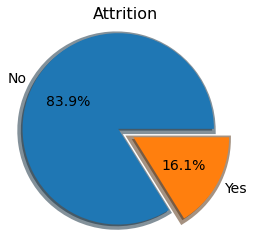

In [21]:
#define data
data = df['Attrition'].value_counts()
labels = ['No', 'Yes']
# 
#create pie chart
plt.pie(data, labels = labels, radius= 1.1, shadow=True, autopct='%.1f%%', 
        textprops = {'color': 'Black','fontsize':14}, wedgeprops = {'linewidth': 7}, explode = [0.10]*2)
plt.title("Attrition", fontsize=16)
plt.show()

This dataset is imbalance, and 16.1% have left the company. So first, we will use Random Forest & using imblearn under sampling & Synthetic Minority Over sampling Technique to balance the dataset. Also, experiment inbalance data option on our ML model.

In [22]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

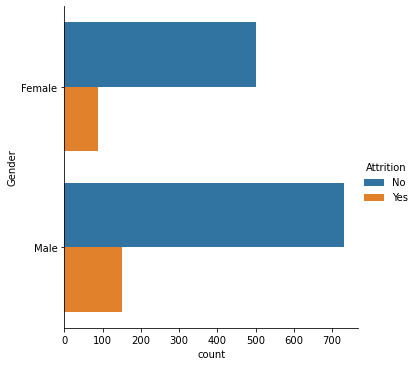

In [23]:
# Seaborn Count plot
sns.catplot(y='Gender', kind='count', hue ='Attrition', data=df);

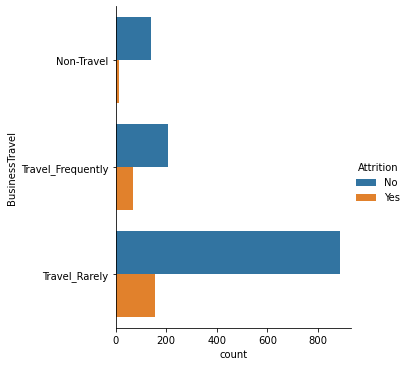

In [24]:
# Seaborn Count plot
sns.catplot(y='BusinessTravel', hue='Attrition', kind = 'count', data=df);

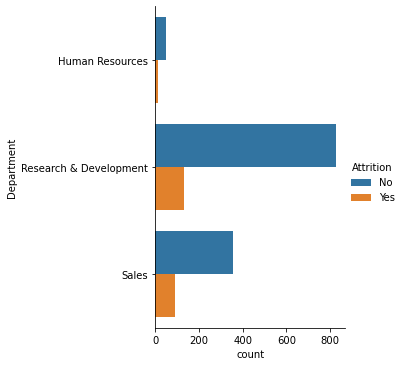

In [25]:
# Seaborn Count plot
sns.catplot(y='Department', hue='Attrition', kind = 'count', data=df);

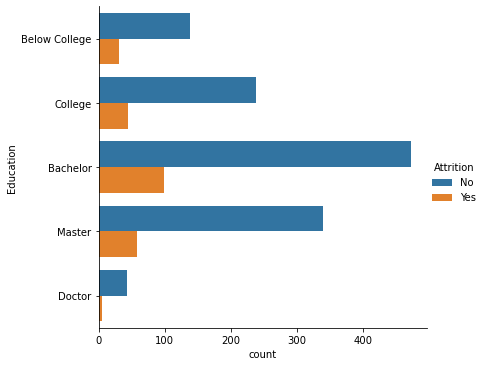

In [26]:
# Seaborn Count plot
sns.catplot(y='Education', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3,4],['Below College','College', 'Bachelor', 'Master', 'Doctor']);

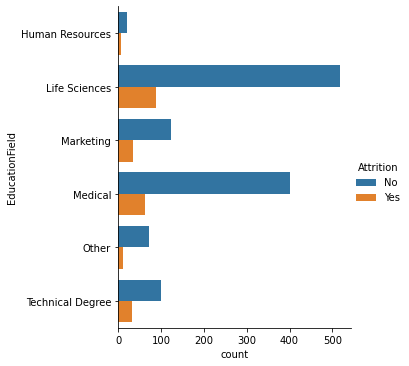

In [27]:
# Seaborn Count plot
sns.catplot(y='EducationField', hue='Attrition', kind = 'count', data=df);

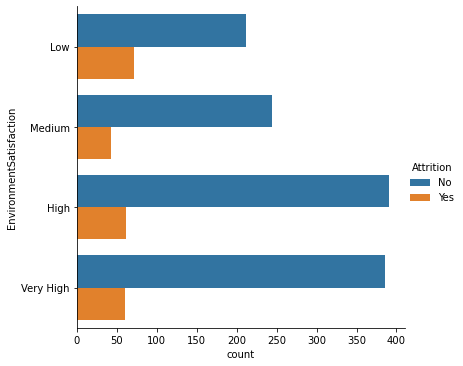

In [28]:
# Seaborn Count plot
sns.catplot(y='EnvironmentSatisfaction', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

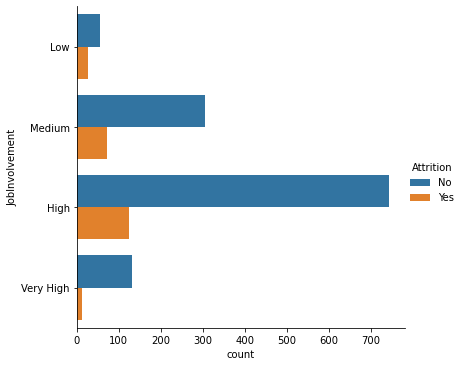

In [29]:
# Seaborn Count plot
sns.catplot(y='JobInvolvement', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

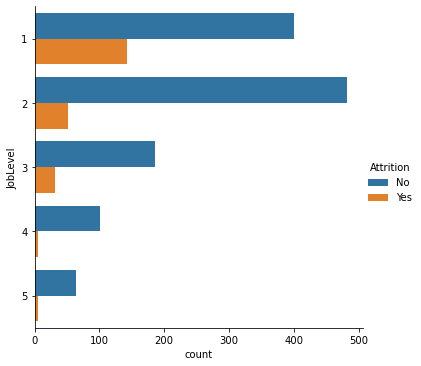

In [30]:
# Seaborn Count plot
sns.catplot(y='JobLevel', hue='Attrition', kind = 'count', data=df);

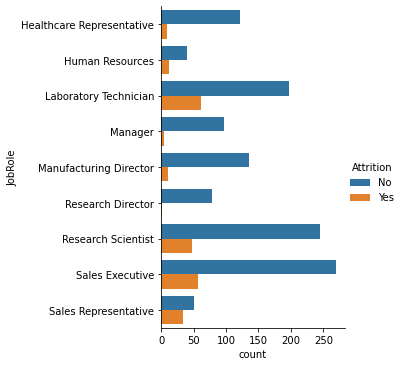

In [31]:
# Seaborn Count plot
ax = sns.catplot(y='JobRole', hue='Attrition', kind = 'count', data=df)

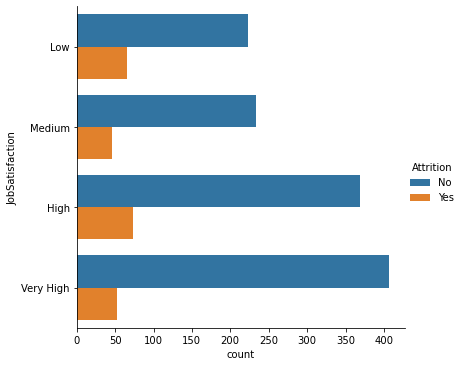

In [32]:
# Seaborn Count plot
sns.catplot(y='JobSatisfaction', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

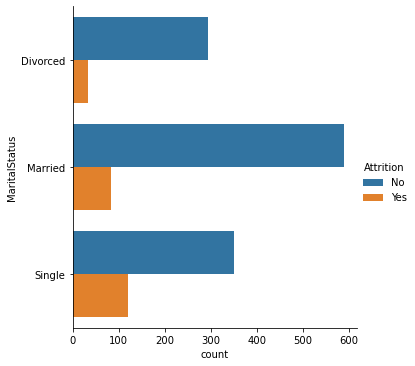

In [33]:
# Seaborn Count plot
sns.catplot(y='MaritalStatus', hue='Attrition', kind = 'count', data=df);

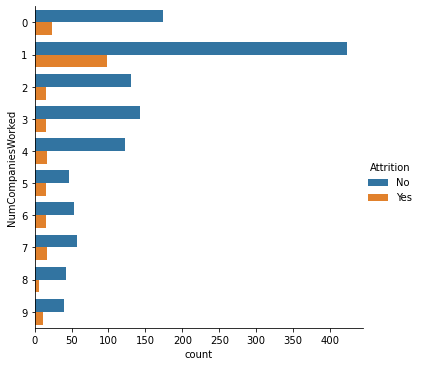

In [34]:
# Seaborn Count plot
sns.catplot(y='NumCompaniesWorked', hue='Attrition', kind = 'count', data=df);

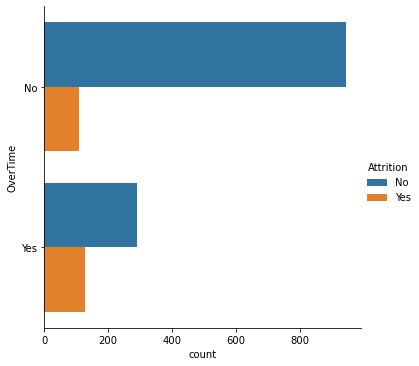

In [35]:
# Seaborn Count plot
sns.catplot(y='OverTime', hue='Attrition', kind = 'count', data=df);

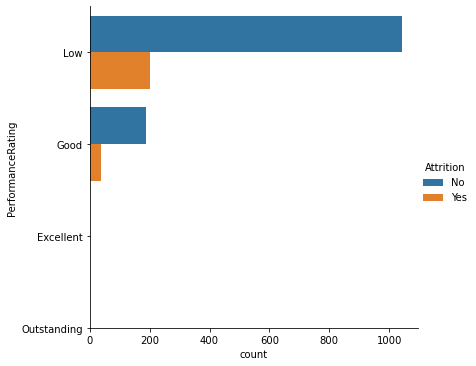

In [36]:
# Seaborn Count plot
sns.catplot(y='PerformanceRating', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Good', 'Excellent', 'Outstanding']);

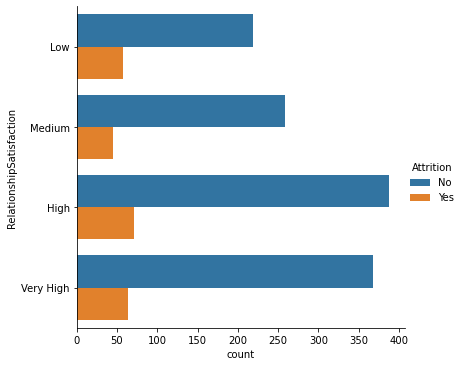

In [37]:
# Seaborn Count plot
sns.catplot(y='RelationshipSatisfaction', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

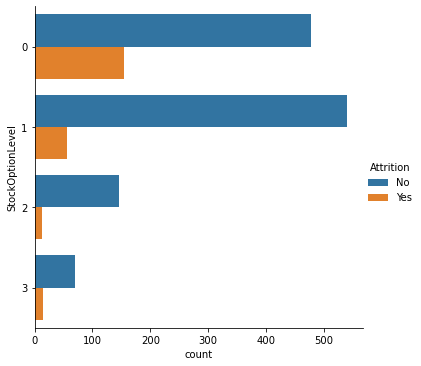

In [38]:
# Seaborn Count plot
sns.catplot(y='StockOptionLevel', hue='Attrition', kind = 'count', data=df);

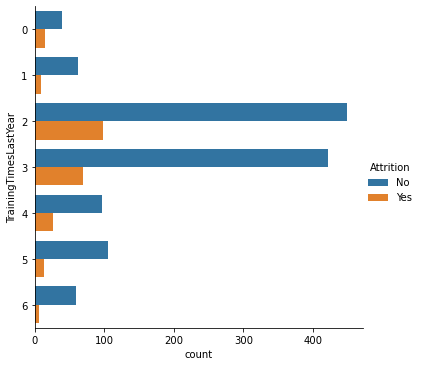

In [39]:
# Seaborn Count plot
sns.catplot(y='TrainingTimesLastYear', hue='Attrition', kind = 'count', data=df);

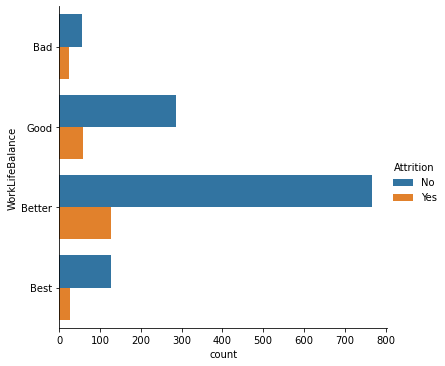

In [40]:
# Seaborn Count plot
sns.catplot(y='WorkLifeBalance', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Bad','Good', 'Better', 'Best']);

In [41]:
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DailyRate                1470 non-null   int64
 2   DistanceFromHome         1470 non-null   int64
 3   HourlyRate               1470 non-null   int64
 4   MonthlyIncome            1470 non-null   int64
 5   MonthlyRate              1470 non-null   int64
 6   PercentSalaryHike        1470 non-null   int64
 7   TotalWorkingYears        1470 non-null   int64
 8   YearsAtCompany           1470 non-null   int64
 9   YearsInCurrentRole       1470 non-null   int64
 10  YearsSinceLastPromotion  1470 non-null   int64
 11  YearsWithCurrManager     1470 non-null   int64
dtypes: int64(12)
memory usage: 137.9 KB


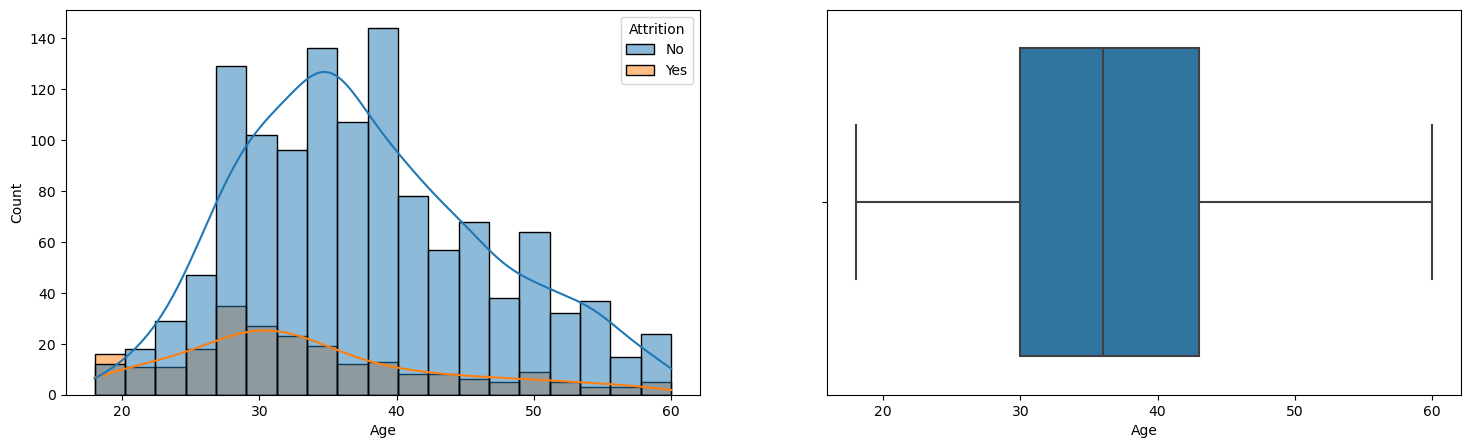

In [42]:
sns.reset_defaults()
# 
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='Age', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='Age',hue='Attrition', data=df);

In [43]:
# Data Issue: Require source correction or/and investigation
# will proceed with the data
df.Attrition[df.Age < 21].value_counts()

Yes    16
No     12
Name: Attrition, dtype: int64

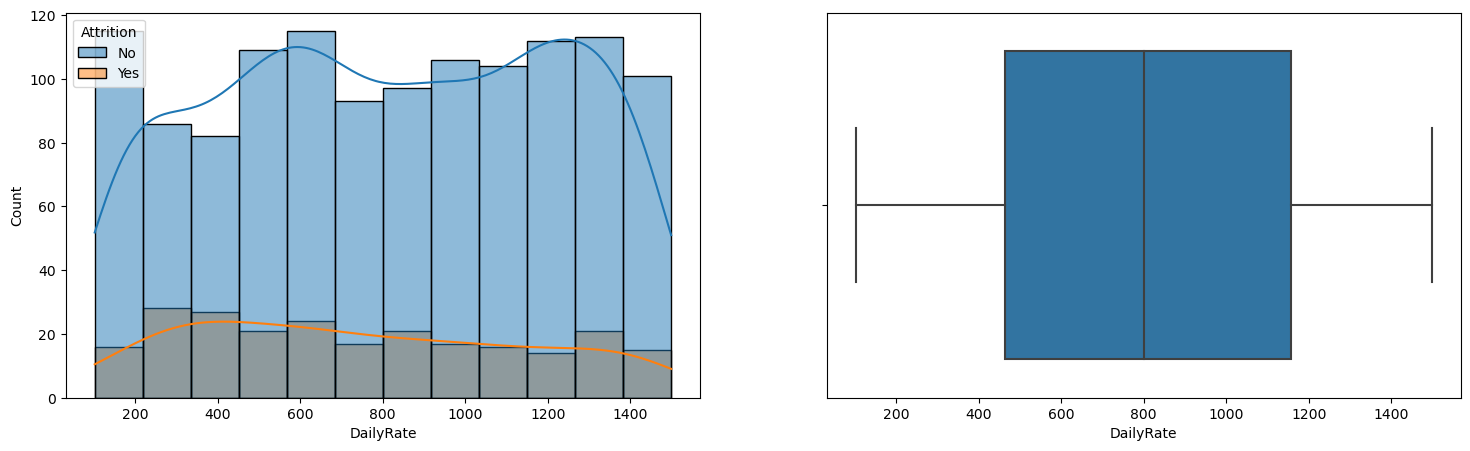

In [44]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='DailyRate', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='DailyRate',hue='Attrition', data=df);

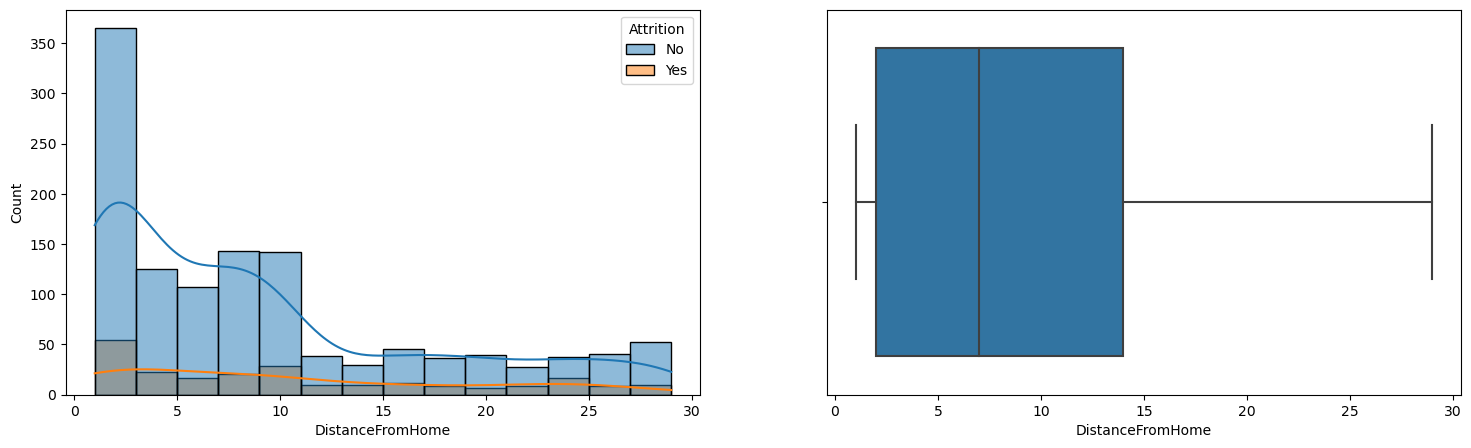

In [45]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='DistanceFromHome', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='DistanceFromHome',hue='Attrition', data=df);

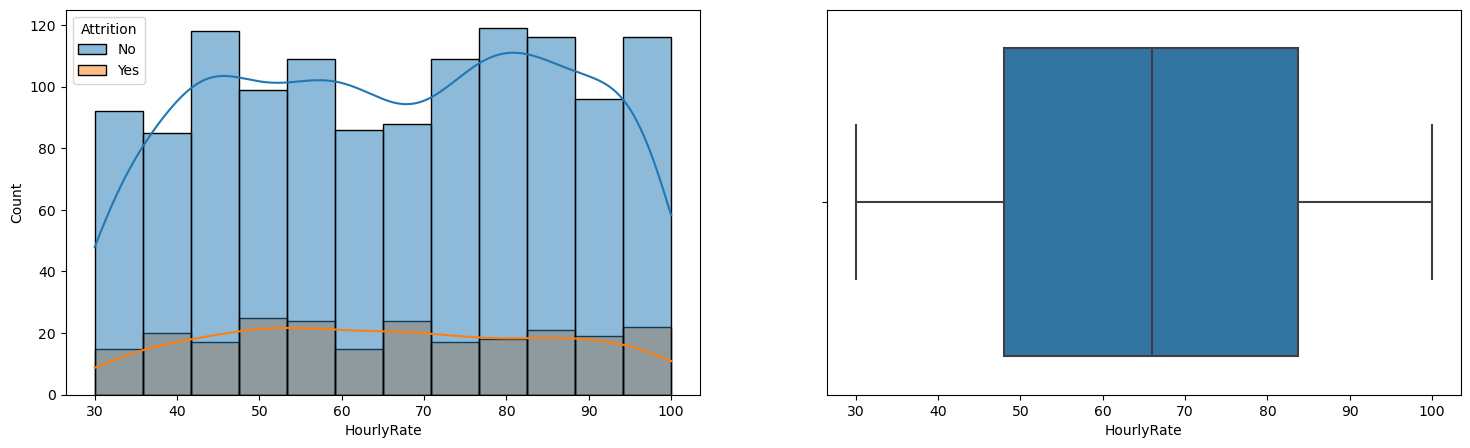

In [46]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='HourlyRate', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='HourlyRate',hue='Attrition', data=df);

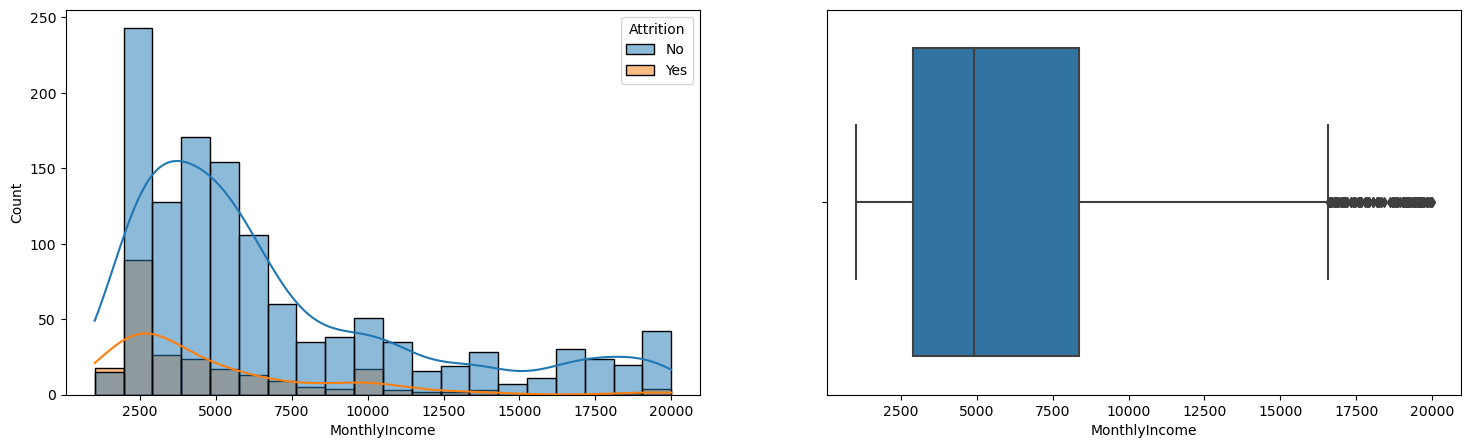

In [47]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='MonthlyIncome', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='MonthlyIncome',hue='Attrition', data=df);

In [48]:
df.MonthlyIncome[df.MonthlyIncome > 17000].count()

97

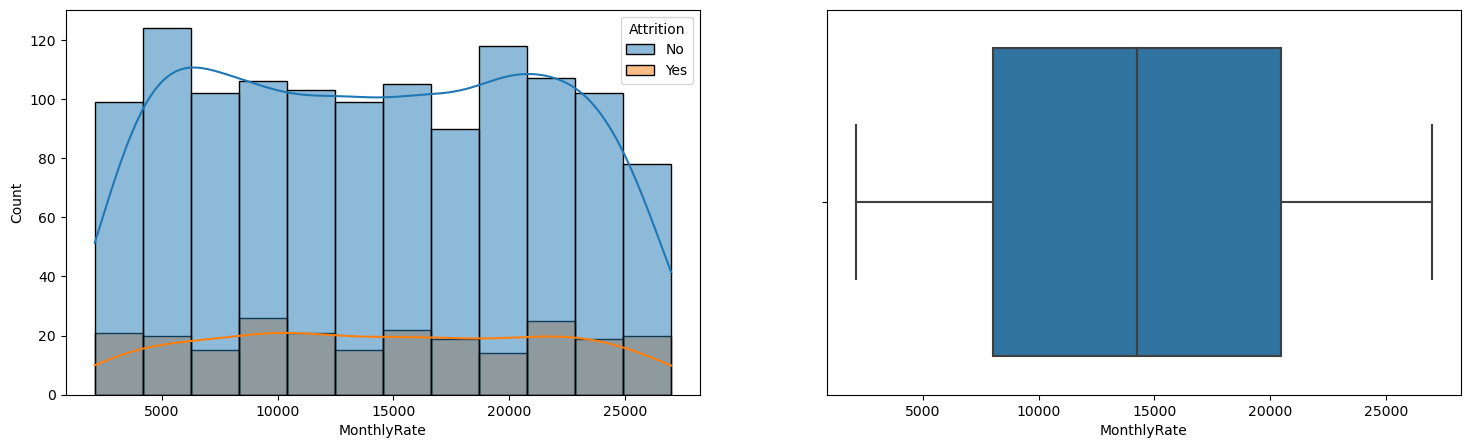

In [49]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='MonthlyRate', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='MonthlyRate',hue='Attrition', data=df);

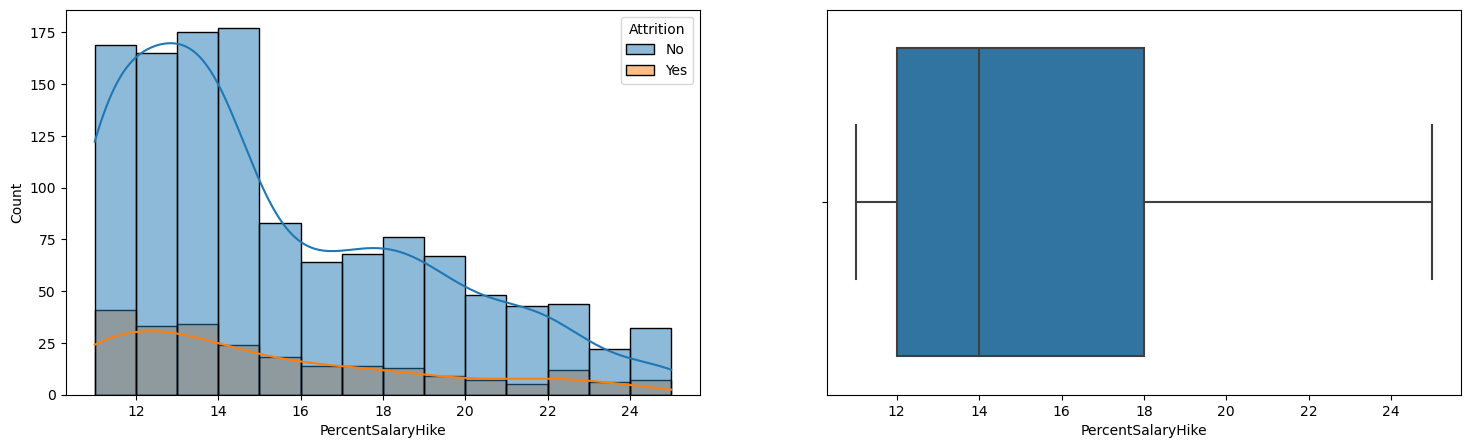

In [50]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='PercentSalaryHike', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='PercentSalaryHike',hue='Attrition', data=df);

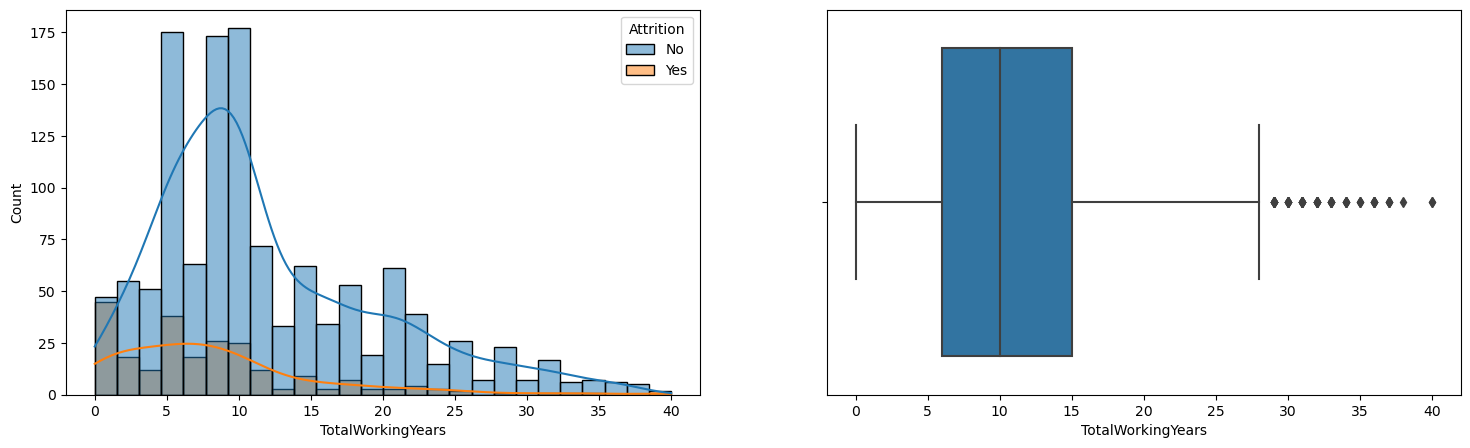

In [51]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='TotalWorkingYears', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='TotalWorkingYears',hue='Attrition', data=df);

In [52]:
df.TotalWorkingYears[df.TotalWorkingYears > 28].count()

63

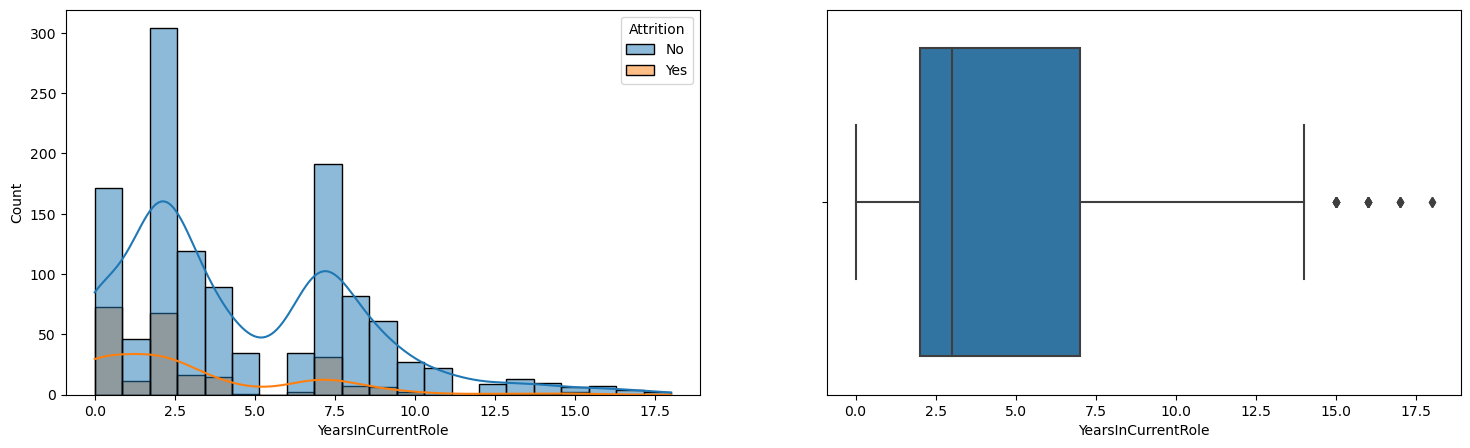

In [53]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='YearsInCurrentRole', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='YearsInCurrentRole',hue='Attrition', data=df);

In [54]:
df.YearsInCurrentRole[df.YearsInCurrentRole > 14].count()

21

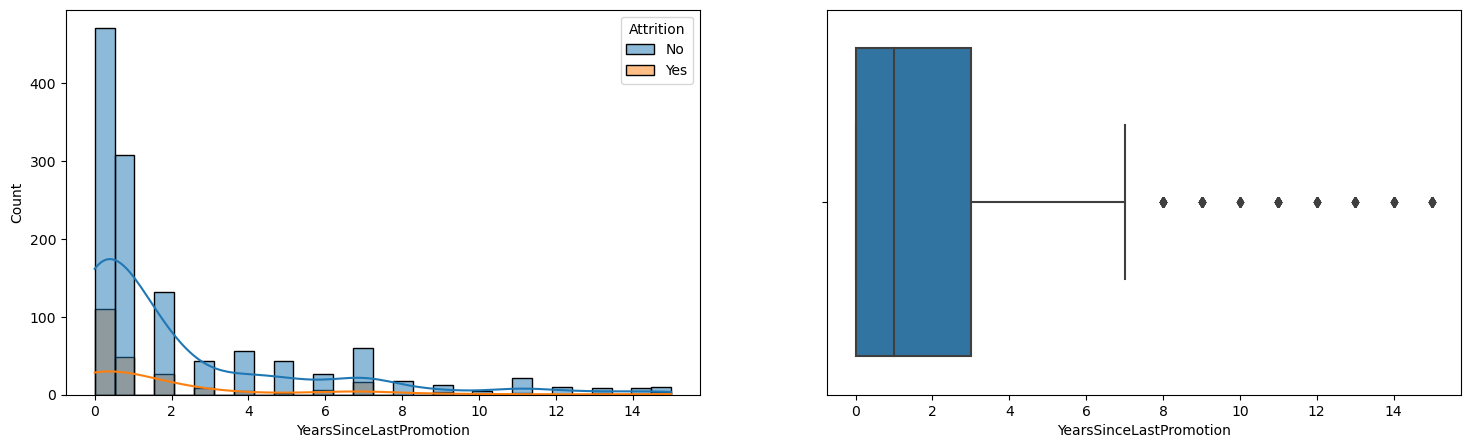

In [55]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='YearsSinceLastPromotion', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='YearsSinceLastPromotion',hue='Attrition', data=df);

In [56]:
df.YearsSinceLastPromotion[df.YearsSinceLastPromotion > 7].count()

107

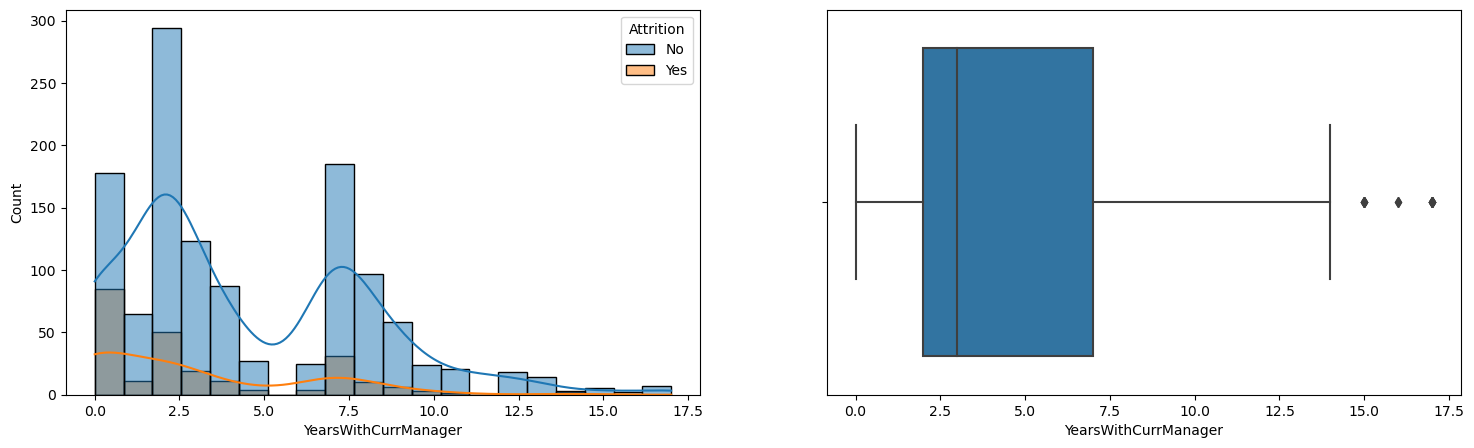

In [57]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='YearsWithCurrManager', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='YearsWithCurrManager',hue='Attrition', data=df);

In [58]:
df.YearsWithCurrManager[df.YearsWithCurrManager > 14].count()

14

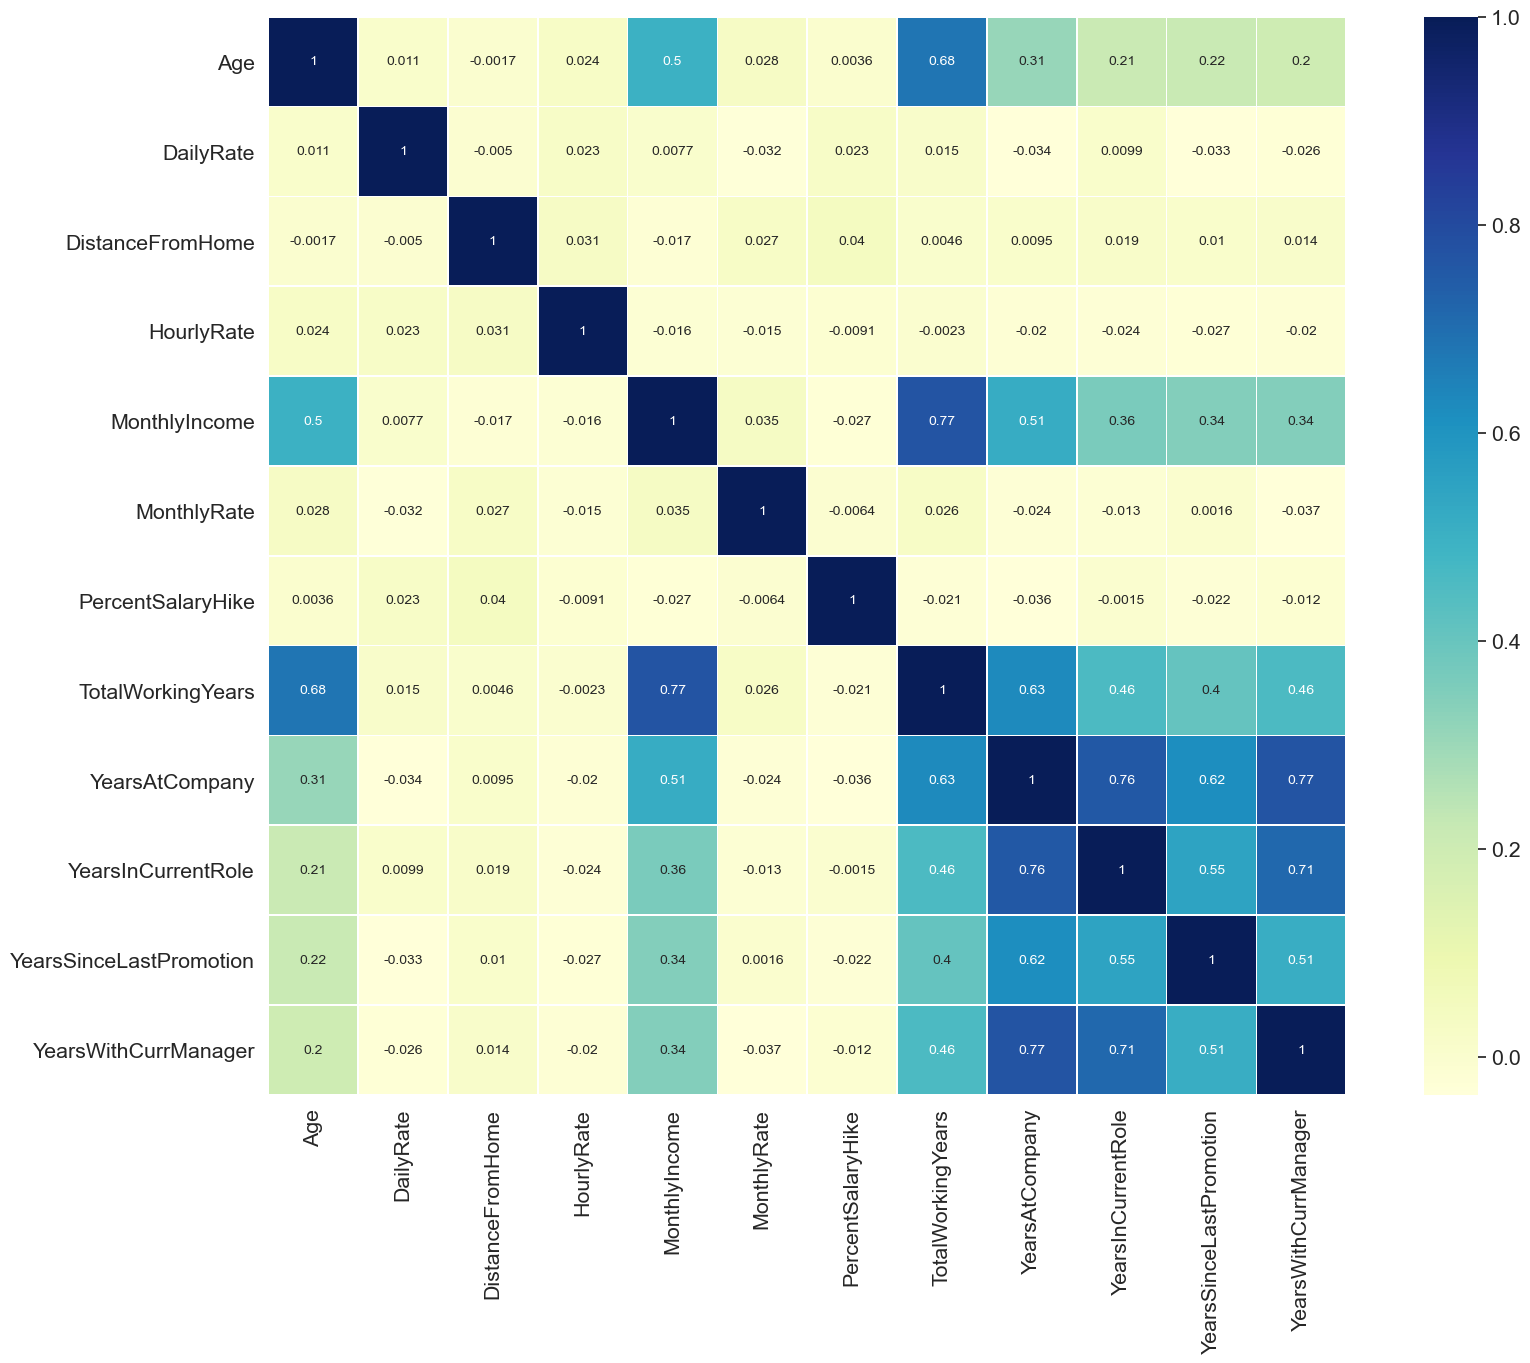

In [59]:
# Make a heatmap of the data
plt.figure(figsize=(20,14))
sns.set(font_scale = 1.4)
sns.heatmap(df.corr() ,annot=True, linewidths=.5, annot_kws={"size":10}, square=True, cmap='YlGnBu');

### Preparing data for Principle Component Analysis (PCA)

In [60]:
# data standardization with sklearn
from sklearn.preprocessing import StandardScaler
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# 
from sklearn.decomposition import PCA
# 
# spliting training and testing data
from sklearn.model_selection import train_test_split
# 
pd.set_option('display.max_rows', None)

In [61]:
df.Attrition.replace(to_replace = dict({'No': 0, 'Yes': 1}), inplace = True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [62]:
df_ = pd.get_dummies(df)
# df_ = pd.get_dummies(df, drop_first=True)

In [63]:
df_.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,94,5993,19479,11,8,6,...,0,0,0,0,0,0,1,0,0,0
1,49,0,279,8,61,5130,24907,23,10,10,...,0,0,1,0,0,0,0,0,1,0
2,37,1,1373,2,92,2090,2396,15,7,0,...,0,0,1,0,0,0,0,0,1,0
3,33,0,1392,3,56,2909,23159,11,8,8,...,0,0,1,0,0,0,0,0,1,0
4,27,0,591,2,40,3468,16632,12,6,2,...,0,0,1,0,0,0,0,0,1,0


In [64]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 94 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   HourlyRate                         1470 non-null   int64
 5   MonthlyIncome                      1470 non-null   int64
 6   MonthlyRate                        1470 non-null   int64
 7   PercentSalaryHike                  1470 non-null   int64
 8   TotalWorkingYears                  1470 non-null   int64
 9   YearsAtCompany                     1470 non-null   int64
 10  YearsInCurrentRole                 1470 non-null   int64
 11  YearsSinceLastPromotion            1470 non-null   int64
 12  YearsWithCurrManager

In [65]:
df_[numeric_cols].head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,11,8,6,4,0,5
1,49,279,8,61,5130,24907,23,10,10,7,1,7
2,37,1373,2,92,2090,2396,15,7,0,0,0,0
3,33,1392,3,56,2909,23159,11,8,8,7,3,0
4,27,591,2,40,3468,16632,12,6,2,2,2,2


In [66]:
# 
seed = 11
size = 0.20
# 
# X, y full data
y =  df_['Attrition']
X =  df_.loc[:, df_.columns != 'Attrition']
# 

In [67]:
# data normalization with sklearn
# fit scaler on data
norm = MinMaxScaler().fit(X)

# transform data
X_norm = norm.transform(X)

In [68]:
# data standardization with sklearn
# copy of datasets
X_stand = X.copy()

# apply standardization on numerical features
for i in numeric_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_stand[[i]])
    
    # transform the training data column
    X_stand[i] = scale.transform(X_stand[[i]])
    

In [69]:
pd.DataFrame(X_norm, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,0.450567,0.217509,0.0,0.285714,0.428571,0.595238,1.0
DailyRate,1470.0,0.501421,0.288840,0.0,0.259843,0.501074,0.755190,1.0
DistanceFromHome,1470.0,0.292590,0.289531,0.0,0.035714,0.214286,0.464286,1.0
HourlyRate,1470.0,0.512731,0.290420,0.0,0.257143,0.514286,0.767857,1.0
MonthlyIncome,1470.0,0.289307,0.247918,0.0,0.100158,0.205898,0.388099,1.0
MonthlyRate,1470.0,0.490629,0.285797,0.0,0.239028,0.487513,0.737503,1.0
PercentSalaryHike,1470.0,0.300680,0.261424,0.0,0.071429,0.214286,0.500000,1.0
TotalWorkingYears,1470.0,0.281990,0.194520,0.0,0.150000,0.250000,0.375000,1.0
YearsAtCompany,1470.0,0.175204,0.153163,0.0,0.075000,0.125000,0.225000,1.0
YearsInCurrentRole,1470.0,0.234958,0.201285,0.0,0.111111,0.166667,0.388889,1.0


In [70]:
X_stand.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,-4.017950e-17,1.000340,-2.072192,-0.758170,-0.101159,0.665354,2.526886
DailyRate,1470.0,7.197568e-17,1.000340,-1.736576,-0.836662,-0.001204,0.878877,1.726730
DistanceFromHome,1470.0,5.164048e-17,1.000340,-1.010909,-0.887515,-0.270544,0.593216,2.444129
HourlyRate,1470.0,1.728021e-16,1.000340,-1.766079,-0.880361,0.005356,0.878771,1.678377
MonthlyIncome,1470.0,-5.403841e-17,1.000340,-1.167343,-0.763209,-0.336552,0.398625,2.867626
MonthlyRate,1470.0,2.394154e-17,1.000340,-1.717284,-0.880644,-0.010906,0.864101,1.782888
PercentSalaryHike,1470.0,2.479498e-16,1.000340,-1.150554,-0.877232,-0.330589,0.762698,2.675949
TotalWorkingYears,1470.0,-9.236753e-17,1.000340,-1.450167,-0.678774,-0.164511,0.478316,3.692454
YearsAtCompany,1470.0,-1.941002e-17,1.000340,-1.144294,-0.654454,-0.327893,0.325228,5.386914
YearsInCurrentRole,1470.0,6.117555e-17,1.000340,-1.167687,-0.615492,-0.339394,0.764998,3.802074


### Principal Component Analysis

In [71]:
pca_norm = PCA()
principalComponents_norm = pca_norm.fit_transform(X_norm)

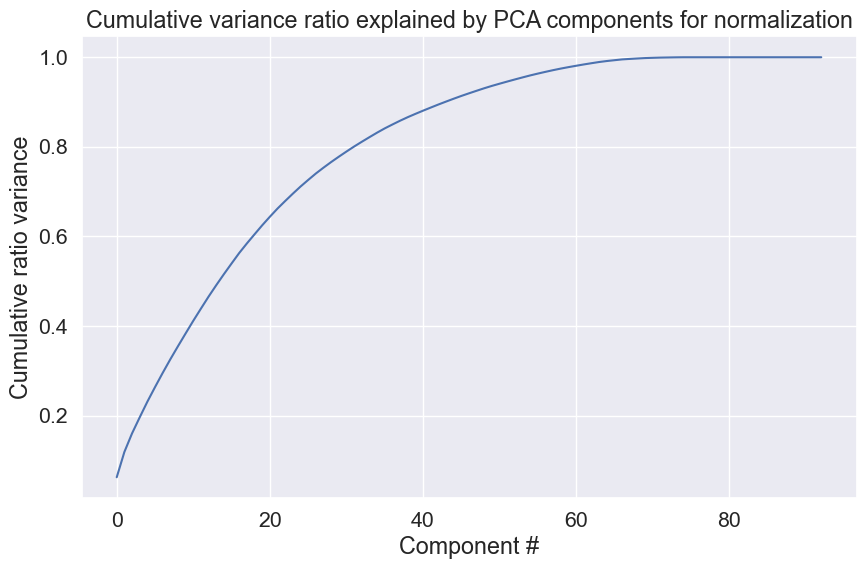

In [72]:
plt.subplots(figsize=(10, 6))
plt.plot(pca_norm.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for normalization');

In [73]:
# Features below does NOT add value according to PCA analysis for normalize data
pd.DataFrame(pca_norm.explained_variance_ratio_.cumsum(), index=X.columns, 
                  columns=["Feature Cumulative Sum"]).tail(19)

,Feature Cumulative Sum
RelationshipSatisfaction_1,1.0
RelationshipSatisfaction_2,1.0
RelationshipSatisfaction_3,1.0
RelationshipSatisfaction_4,1.0
StockOptionLevel_0,1.0
StockOptionLevel_1,1.0
StockOptionLevel_2,1.0
StockOptionLevel_3,1.0
TrainingTimesLastYear_0,1.0
TrainingTimesLastYear_1,1.0


In [74]:
pca_stand = PCA()
principalComponents_stand = pca_stand.fit_transform(X_stand)

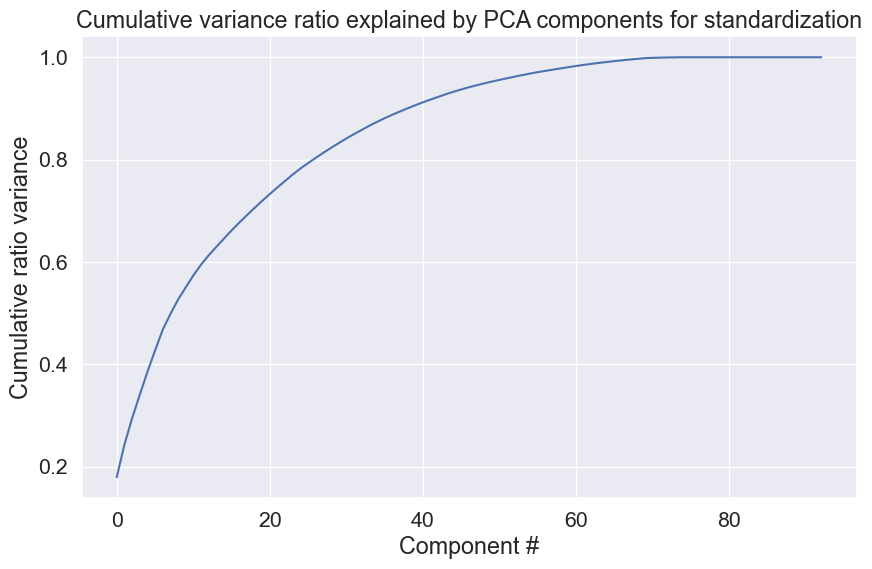

In [75]:
plt.subplots(figsize=(10, 6))
plt.plot(pca_stand.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for standardization');

In [76]:
# Features below does NOT add value according to PCA analysis for standardize data
pd.DataFrame(pca_stand.explained_variance_ratio_.cumsum(), index=X.columns, 
                  columns=["Feature Cumulative Sum"]).tail(19)

,Feature Cumulative Sum
RelationshipSatisfaction_1,1.0
RelationshipSatisfaction_2,1.0
RelationshipSatisfaction_3,1.0
RelationshipSatisfaction_4,1.0
StockOptionLevel_0,1.0
StockOptionLevel_1,1.0
StockOptionLevel_2,1.0
StockOptionLevel_3,1.0
TrainingTimesLastYear_0,1.0
TrainingTimesLastYear_1,1.0


#### The above features that do not contribute are identical for normalized and standardized will be removed from our model.

In [77]:
# 
remove = pd.DataFrame(pca_norm.explained_variance_ratio_.cumsum(), index=X.columns, 
                  columns=["Feature Cumulative Sum"]).tail(19)
remove.reset_index(inplace=True)
remove = remove['index'].tolist()
# 
X_ = X.drop(remove, axis=1)

#### Random under-sampling

In [78]:
# Random under-sampling with imblearn
from imblearn.under_sampling import RandomUnderSampler
# 
under = RandomUnderSampler(random_state=seed, replacement=True)
# fit predictor and target variable
%time X_under_remove, y_under_remove = under.fit_resample(X_, y)
# fit predictor and target variable
%time X_under_full, y_under_full = under.fit_resample(X, y)
# 
print('\n')
print('Removed Features dataset count:', len(y))
print('Resample Removed Features dataset count', len(y_under_remove))
print('Resample Removed Features dataset shape', X_under_remove.shape)
# 
print('\n')
print('Original Full Features dataset count:', len(y))
print('Resample Full Features dataset count', len(y_under_full))
print('Resample Full Features dataset shape', X_under_full.shape)

CPU times: user 11 ms, sys: 118 µs, total: 11.1 ms
Wall time: 11.1 ms
CPU times: user 13.5 ms, sys: 587 µs, total: 14.1 ms
Wall time: 13.8 ms


Removed Features dataset count: 1470
Resample Removed Features dataset count 474
Resample Removed Features dataset shape (474, 74)


Original Full Features dataset count: 1470
Resample Full Features dataset count 474
Resample Full Features dataset shape (474, 93)


#### Random under-sample Train & 20% Test Split

In [79]:
# Data set
X_train_under_remove, X_test_under_remove, y_train_under_remove, y_test_under_remove = train_test_split(
                                                    X_under_remove, y_under_remove, test_size=size, 
                                                    stratify=y_under_remove, random_state=seed)
# 
# Data set with Full Features
X_train_under_full, X_test_under_full, y_train_under_full, y_test_under_full = train_test_split(
                                                                        X_under_full, y_under_full, 
                                                                        test_size=size,stratify=y_under_full, 
                                                                        random_state=seed)

In [80]:
# import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
# 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# 
from numpy import mean
# 

### AdaBoost Classifier with Logistic Regression

In [81]:
# Params for All the Logistic Regression
params_lr = {
             'max_iter' : 100_000,
             'multi_class' : 'ovr', 
             'random_state' : seed,
            }
# 
log_reg = LogisticRegression(**params_lr)
# 
params_ada = {'base_estimator' : log_reg,
              'n_estimators' : 100,
              'learning_rate' : 1.5,
              'random_state' : seed,
             }
# 
ada_clf = AdaBoostClassifier(**params_ada)
# 
ada_clf_under = ada_clf.fit(X_train_under_remove,y_train_under_remove)
# 
y_pred_under_lr = ada_clf_under.predict(X_test_under_remove)
# 
print(classification_report(y_test_under_remove, y_pred_under_lr))
# 
print(ada_clf_under)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(ada_clf_under, X_test_under_remove, y_test_under_remove, 
                              scoring='roc_auc', cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(ada_clf_under, X_train_under_remove, y_train_under_remove, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')

              precision    recall  f1-score   support

           0       0.81      0.64      0.71        47
           1       0.71      0.85      0.77        48

    accuracy                           0.75        95
   macro avg       0.76      0.75      0.74        95
weighted avg       0.76      0.75      0.74        95

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=100000,
                                                     multi_class='ovr',
                                                     random_state=11),
                   learning_rate=1.5, n_estimators=100, random_state=11)


Mean Test  ROC AUC: 0.7266
Mean Train ROC AUC: 0.8207




### Logistic Regression

In [82]:
# 
log_reg = LogisticRegression(**params_lr)
# 
log_reg_under = log_reg.fit(X_train_under_remove,y_train_under_remove)
# 
y_pred_under_lr = log_reg_under.predict(X_test_under_remove)
# 
print(classification_report(y_test_under_remove, y_pred_under_lr))
# 
print(log_reg_under)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(log_reg_under, X_test_under_remove, y_test_under_remove, 
                              scoring='roc_auc', cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(log_reg_under, X_train_under_remove, y_train_under_remove, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')

              precision    recall  f1-score   support

           0       0.78      0.68      0.73        47
           1       0.72      0.81      0.76        48

    accuracy                           0.75        95
   macro avg       0.75      0.75      0.75        95
weighted avg       0.75      0.75      0.75        95

LogisticRegression(max_iter=100000, multi_class='ovr', random_state=11)


Mean Test  ROC AUC: 0.7262
Mean Train ROC AUC: 0.8258




In [83]:
# 
log_reg = LogisticRegression(**params_lr)
# 
log_reg_full = log_reg.fit(X_train_under_full,y_train_under_full)
# 
y_pred_under_lr_ = log_reg_full.predict(X_test_under_full)
# 
print(classification_report(y_test_under_full, y_pred_under_lr_))
# 
print(log_reg_full)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(log_reg_full, X_test_under_full, y_test_under_full, 
                              scoring='roc_auc', cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(log_reg_full, X_train_under_full, y_train_under_full, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')

              precision    recall  f1-score   support

           0       0.80      0.70      0.75        47
           1       0.74      0.83      0.78        48

    accuracy                           0.77        95
   macro avg       0.77      0.77      0.77        95
weighted avg       0.77      0.77      0.77        95

LogisticRegression(max_iter=100000, multi_class='ovr', random_state=11)


Mean Test  ROC AUC: 0.6984
Mean Train ROC AUC: 0.8317




#### Over Sampling (Synthetic Minority Oversampling Technique)

In [84]:
# import library for over sampling
from imblearn.over_sampling import SMOTE
# 
params = {'sampling_strategy' : 'auto',
                'random_state' : seed,
                'n_jobs' : (-1),
               }
# Model
over = SMOTE(**params)
# 
# fit predictor and target variable
%time X_over_remove, y_over_remove = over.fit_resample(X_, y)
# fit predictor and target variable
%time X_over_full, y_over_full = over.fit_resample(X, y)
# 
print('\n')
print('Removed Features dataset count:', len(y))
print('Resample Removed Features dataset count', len(y_over_remove))
print('Resample Removed Features dataset shape', X_over_remove.shape)
# 
print('\n')
print('Original Full Features dataset count:', len(y))
print('Resample Full Features dataset count', len(y_over_full))
print('Resample Full Features dataset shape', X_over_full.shape)
# 

CPU times: user 90.3 ms, sys: 25.3 ms, total: 116 ms
Wall time: 18.1 ms
CPU times: user 125 ms, sys: 47.2 ms, total: 173 ms
Wall time: 22.4 ms


Removed Features dataset count: 1470
Resample Removed Features dataset count 2466
Resample Removed Features dataset shape (2466, 74)


Original Full Features dataset count: 1470
Resample Full Features dataset count 2466
Resample Full Features dataset shape (2466, 93)


#### Random over-sample Train & 20% Test Split

In [85]:
# Data set
X_train_over_remove, X_test_over_remove, y_train_over_remove, y_test_over_remove = train_test_split(
                                                    X_over_remove, y_over_remove, test_size=size, 
                                                    stratify=y_over_remove, random_state=seed)
# 
# Data set with Full Features
X_train_over_full, X_test_over_full, y_train_over_full, y_test_over_full = train_test_split(
                                                        X_over_full, y_over_full, test_size=size,
                                                        stratify=y_over_full, random_state=seed)
    

In [86]:
#  
log_reg = LogisticRegression(**params_lr)
# 
log_reg_over = log_reg.fit(X_train_over_remove,y_train_over_remove)
# 
y_pred_over_lr = log_reg_over.predict(X_test_over_remove)
# 
print(classification_report(y_test_over_remove, y_pred_over_lr))
# 
print(log_reg_over)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(log_reg_over, X_test_over_remove, y_test_over_remove, 
                              scoring='roc_auc', cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(log_reg_over, X_train_over_remove, y_train_over_remove, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.95      0.88      0.91       247

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494

LogisticRegression(max_iter=100000, multi_class='ovr', random_state=11)


Mean Test  ROC AUC: 0.9504
Mean Train ROC AUC: 0.9635




In [87]:
# 
log_reg = LogisticRegression(**params_lr)
# 
log_reg_full = log_reg.fit(X_train_over_full,y_train_over_full)
# 
y_pred_over_lr_ = log_reg_full.predict(X_test_over_full)
# 
print(classification_report(y_test_over_full, y_pred_over_lr_))
# 
print(log_reg_full)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(log_reg_full, X_test_over_full, y_test_over_full, 
                              scoring='roc_auc', cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(log_reg_full, X_train_over_full, y_train_over_full, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       247
           1       0.93      0.91      0.92       247

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494

LogisticRegression(max_iter=100000, multi_class='ovr', random_state=11)


Mean Test  ROC AUC: 0.9498
Mean Train ROC AUC: 0.9668




#### Combination of over and under sampling

In [88]:
# 
from imblearn.combine import SMOTEENN
# 
params = {'sampling_strategy' : 'auto',
                'random_state' : seed,
                'n_jobs' : (-1),
               }
# 
smote_enn = SMOTEENN(**params)
#                     
X_mixed_remove, y_mixed_remove = smote_enn.fit_resample(X_, y)
# 
X_mixed_full, y_mixed_full = smote_enn.fit_resample(X, y)
# 
# 
print('\n')
print('Removed Features dataset count:', len(y))
print('Resample Removed Features dataset count', len(y_mixed_remove))
print('Resample Removed Features dataset shape', X_mixed_remove.shape)
# 
print('\n')
print('Original Full Features dataset count:', len(y))
print('Resample Full Features dataset count', len(y_mixed_full))
print('Resample Full Features dataset shape', X_mixed_full.shape)
# 



Removed Features dataset count: 1470
Resample Removed Features dataset count 1449
Resample Removed Features dataset shape (1449, 74)


Original Full Features dataset count: 1470
Resample Full Features dataset count 1449
Resample Full Features dataset shape (1449, 93)


#### Random over/under sample Train & 20% Test Split

In [89]:
# Data set
X_train_mixed_remove, X_test_mixed_remove, y_train_mixed_remove, y_test_mixed_remove = train_test_split(
                                                    X_mixed_remove, y_mixed_remove, test_size=size, 
                                                    stratify=y_mixed_remove, random_state=seed)
# 
# Data set with Full Features
X_train_mixed_full, X_test_mixed_full, y_train_mixed_full, y_test_mixed_full = train_test_split(
                                                        X_mixed_full, y_mixed_full, test_size=size,
                                                        stratify=y_mixed_full, random_state=seed)

In [90]:
#  
log_reg = LogisticRegression(**params_lr)
# 
log_reg_mixed = log_reg.fit(X_train_mixed_remove,y_train_mixed_remove)
# 
y_pred_mixed_lr = log_reg_mixed.predict(X_test_mixed_remove)
# 
print(classification_report(y_test_mixed_remove, y_pred_mixed_lr))
# 
print(log_reg_mixed)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(log_reg_mixed, X_test_mixed_remove, y_test_mixed_remove, 
                              scoring='roc_auc', cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(log_reg_mixed, X_train_mixed_remove, y_train_mixed_remove, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       126
           1       0.91      0.91      0.91       164

    accuracy                           0.90       290
   macro avg       0.90      0.90      0.90       290
weighted avg       0.90      0.90      0.90       290

LogisticRegression(max_iter=100000, multi_class='ovr', random_state=11)


Mean Test  ROC AUC: 0.9366
Mean Train ROC AUC: 0.9697




In [91]:
# 
log_reg = LogisticRegression(**params_lr)
# 
log_reg_full = log_reg.fit(X_train_mixed_full,y_train_mixed_full)
# 
y_pred_mixed_lr_ = log_reg_full.predict(X_test_mixed_full)
# 
print(classification_report(y_test_mixed_full, y_pred_mixed_lr_))
# 
print(log_reg_full)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(log_reg_full, X_test_mixed_full, y_test_mixed_full, 
                              scoring='roc_auc', cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(log_reg_full, X_train_mixed_full, y_train_mixed_full, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       126
           1       0.91      0.91      0.91       164

    accuracy                           0.90       290
   macro avg       0.89      0.89      0.89       290
weighted avg       0.90      0.90      0.90       290

LogisticRegression(max_iter=100000, multi_class='ovr', random_state=11)


Mean Test  ROC AUC: 0.9423
Mean Train ROC AUC: 0.9718




##### Note: 
- According to PCA analysis, 19 features DID NOT add value to the model, but Logistic Regression told a different story. There was a slight decrease in the ROC AUC of overall sampling techniques without removing any features except for the mixed sampling because of over & under sampling produces unbalanced data.
- Using removed feature Data sets for ML
- Over-sample data set (SMOTE) will be used

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       247
           1       0.96      0.89      0.92       247

    accuracy                           0.92       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.92      0.92       494

RandomForestClassifier(max_features=0.2, n_jobs=-1, random_state=11)


Mean Test  ROC AUC: 0.9553
Mean Train ROC AUC: 0.9768




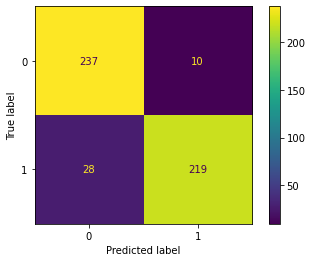

In [92]:
sns.reset_orig()
# 
params_rf = {'max_features' : 0.20,   ## random forest to take 20% of variables in individual run
             'n_jobs' : (-1),
             'random_state' : seed,
            }
#  Random Forest - Undersampling with Full Features
rfc_ = RandomForestClassifier(**params_rf)
# 
rfc_over_remove = rfc_.fit(X_train_over_remove, y_train_over_remove)
# 
y_pred_rfc = rfc_over_remove.predict(X_test_over_remove)
# 
print(classification_report(y_test_over_remove, y_pred_rfc))
# 
print(rfc_over_remove)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(rfc_over_remove, X_test_over_remove, y_test_over_remove, scoring='roc_auc', 
                              cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(rfc_over_remove, X_train_over_remove, y_train_over_remove, scoring='roc_auc', 
                               cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')
cm = confusion_matrix(y_test_over_full, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_over_remove.classes_)
disp.plot();

Total Features in the Dataset: 74


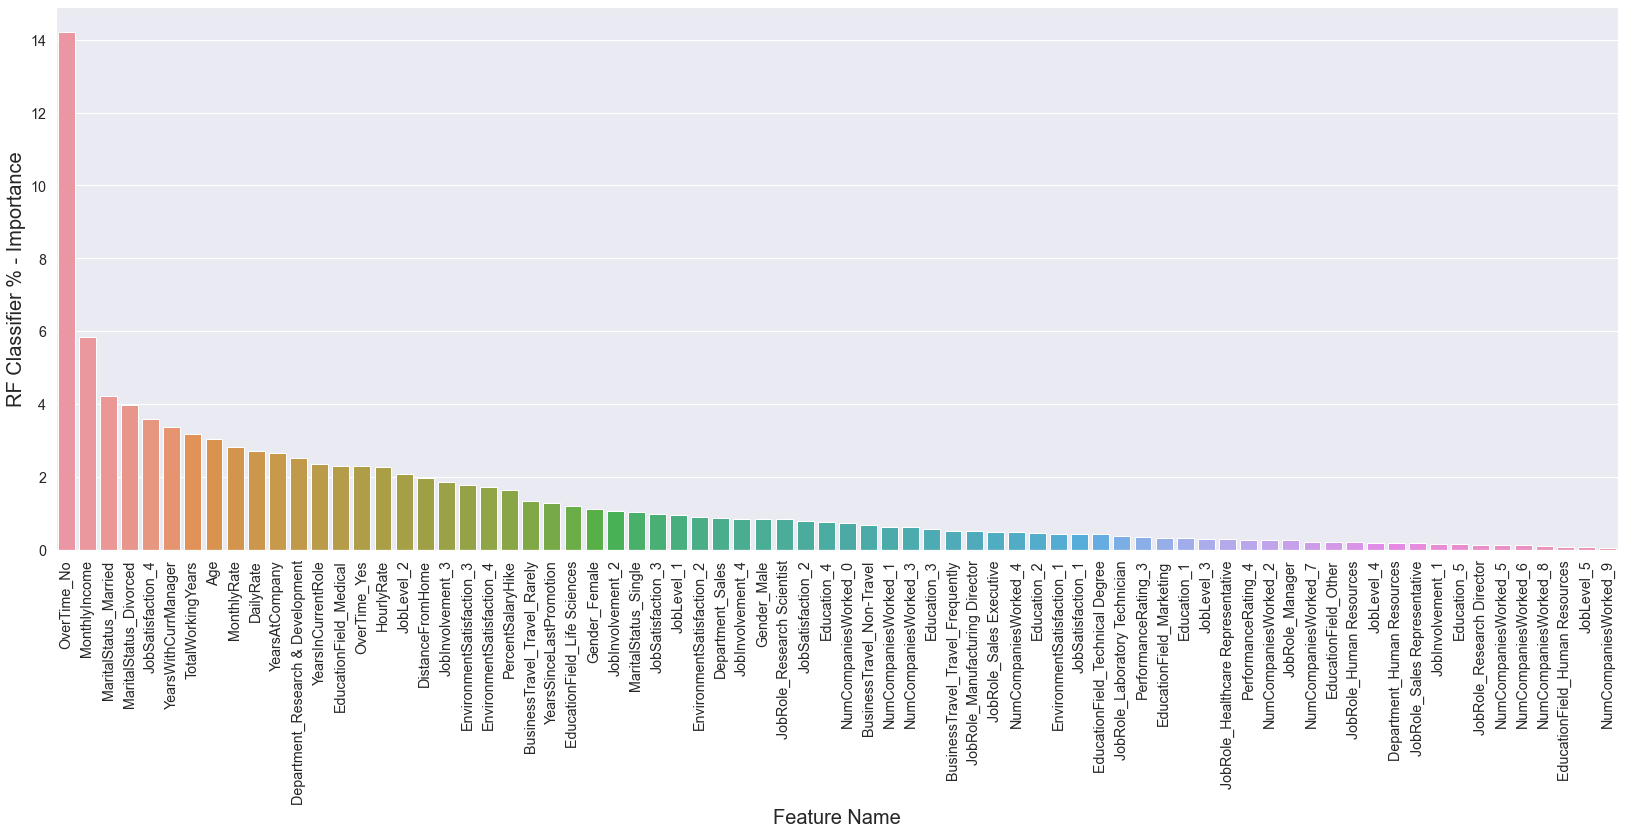

In [93]:
sns.reset_orig()
# 
df_ = pd.DataFrame(rfc_over_remove.feature_importances_ * 100, index=X_.columns, 
                  columns=["RFC %-importance"])
# 
df_.reset_index(inplace=True)
df_.sort_values('RFC %-importance', ascending=False, inplace=True)
# 
sns.set(rc = {'figure.figsize':(28,10)}, font_scale = 1.3)
plot=sns.barplot(data=df_,  x="index", y="RFC %-importance")
plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_xlabel("Feature Name", fontsize = 20)
plot.set_ylabel("RF Classifier % - Importance", fontsize = 20);
# 
print('Total Features in the Dataset: ' + str(df_['index'].count()))

### LGBM Classifier

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.96      0.87      0.91       247

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494

LGBMClassifier(max_depth=0, n_estimators=1000, objective='binary',
               random_state=11)


Mean Test  ROC AUC: 0.9491
Mean Train ROC AUC: 0.9687




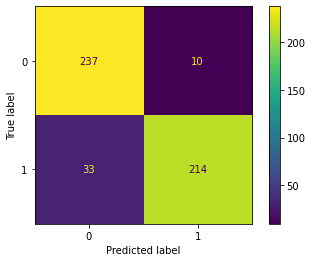

In [94]:
sns.reset_orig()
# 
params_lgbm = {'objective': 'binary',
               'max_depth' : 0,
               'n_estimators' : 1000,
               'n_jobs' : (-1),
               'random_state' : seed,
              }
# 
# Light GBM Classifier 
lgbm_ = LGBMClassifier(**params_lgbm)
# Train LGBM Classifier
lgbm_over_remove = lgbm_.fit(X_train_over_remove, y_train_over_remove)
# Predict the response for test dataset
y_pred_lgbm = lgbm_over_remove.predict(X_test_over_remove)
# 
print(classification_report(y_test_over_remove, y_pred_lgbm))
# 
print(lgbm_over_remove)
print('\n')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(lgbm_over_remove, X_test_over_remove, y_test_over_remove, scoring='roc_auc', 
                              cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(lgbm_over_remove, X_train_over_remove, y_train_over_remove, scoring='roc_auc', 
                               cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')
cm = confusion_matrix(y_test_over_remove, y_pred_lgbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_over_remove.classes_)
disp.plot();

Total Features in the Dataset: 74


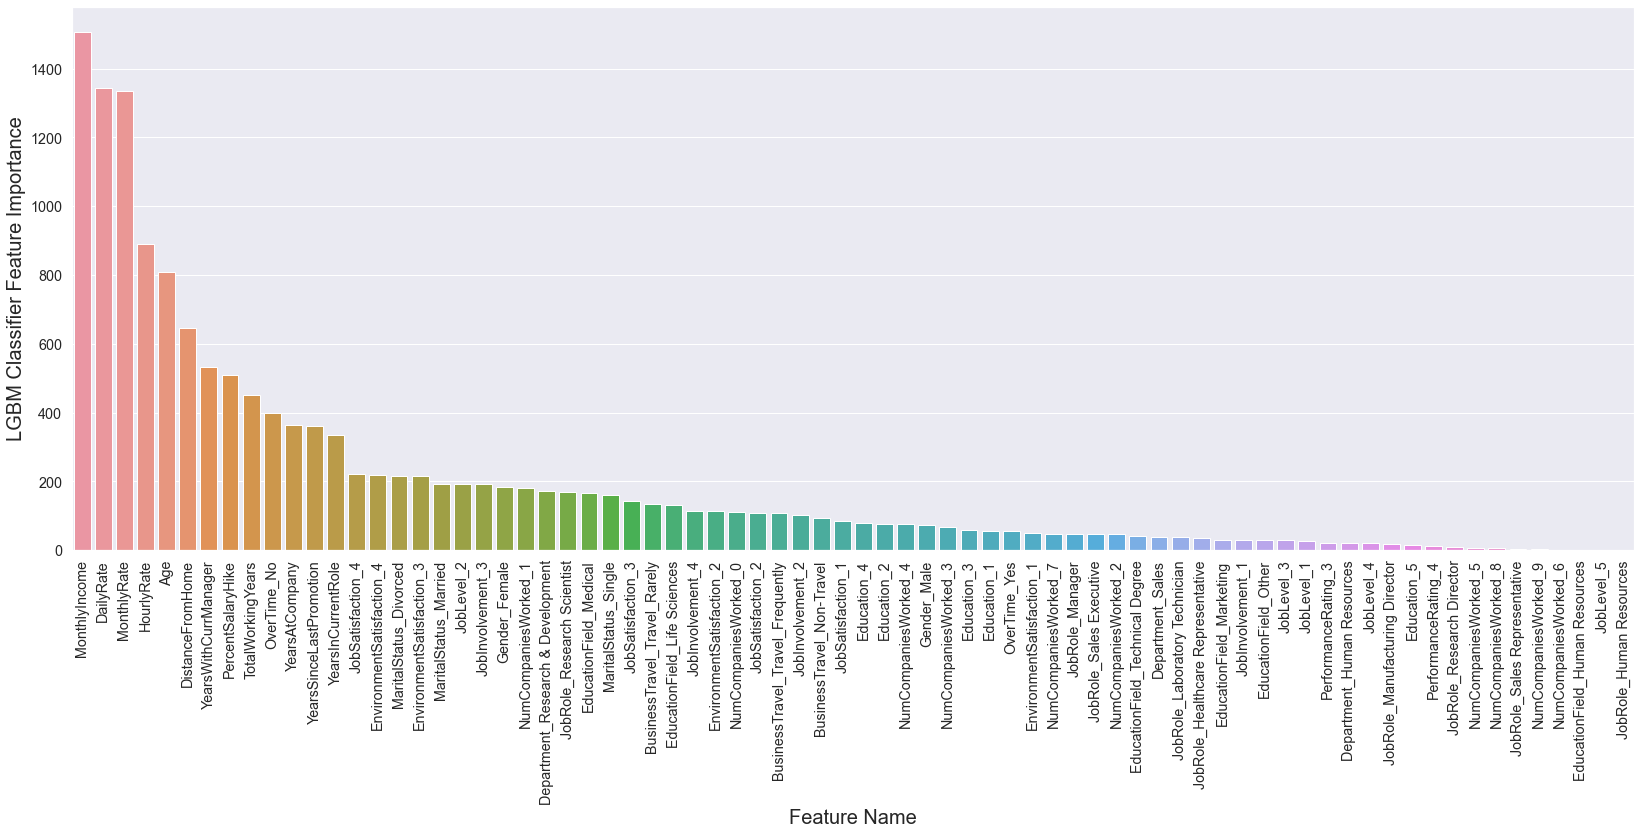

In [95]:
sns.reset_orig()
# 
df_ = pd.DataFrame(lgbm_over_remove.feature_importances_, index=X_.columns, 
                  columns=["LGBM Feature Importance"])
# 
df_.reset_index(inplace=True)
df_.sort_values('LGBM Feature Importance', ascending=False, inplace=True)
# 
sns.set(rc = {'figure.figsize':(28,10)}, font_scale = 1.3)
plot=sns.barplot(data=df_,  x="index", y="LGBM Feature Importance")
plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_xlabel("Feature Name", fontsize = 20)
plot.set_ylabel("LGBM Classifier Feature Importance", fontsize = 20);
# 
print('Total Features in the Dataset: ' + str(df_['index'].count()))

### XGB Classifier

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.95      0.89      0.92       247

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=11, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


Mean Test  ROC AUC: 0.9459
Me

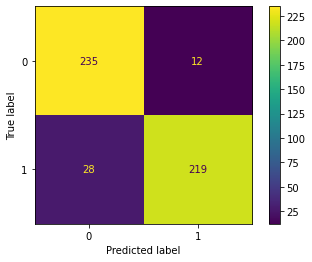

In [96]:
sns.reset_orig()
# 
params_xgb = {
    'objective':'binary:logistic',
    'use_label_encoder' : False,
    'n_jobs' : (-1),  
    'eval_metric' : 'auc',
    'random_state' : seed,
                }
# 
# Standard XGB Model
xgb_ = XGBClassifier(**params_xgb)
# 
#Train the model using the training sets
xgb_over_remove = xgb_.fit(X_train_over_remove,y_train_over_remove)
# 
y_pred_xgb = xgb_over_remove.predict(X_test_over_remove)
# 
print(classification_report(y_test_over_remove, y_pred_xgb))
print(xgb_over_remove)
print('\n')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(xgb_over_remove, X_test_over_remove, y_test_over_remove, scoring='roc_auc', 
                              cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(xgb_over_remove, X_train_over_remove, y_train_over_remove, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')
cm = confusion_matrix(y_test_over_remove, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_over_remove.classes_)
disp.plot();
# 

Total Features in the Dataset: 74


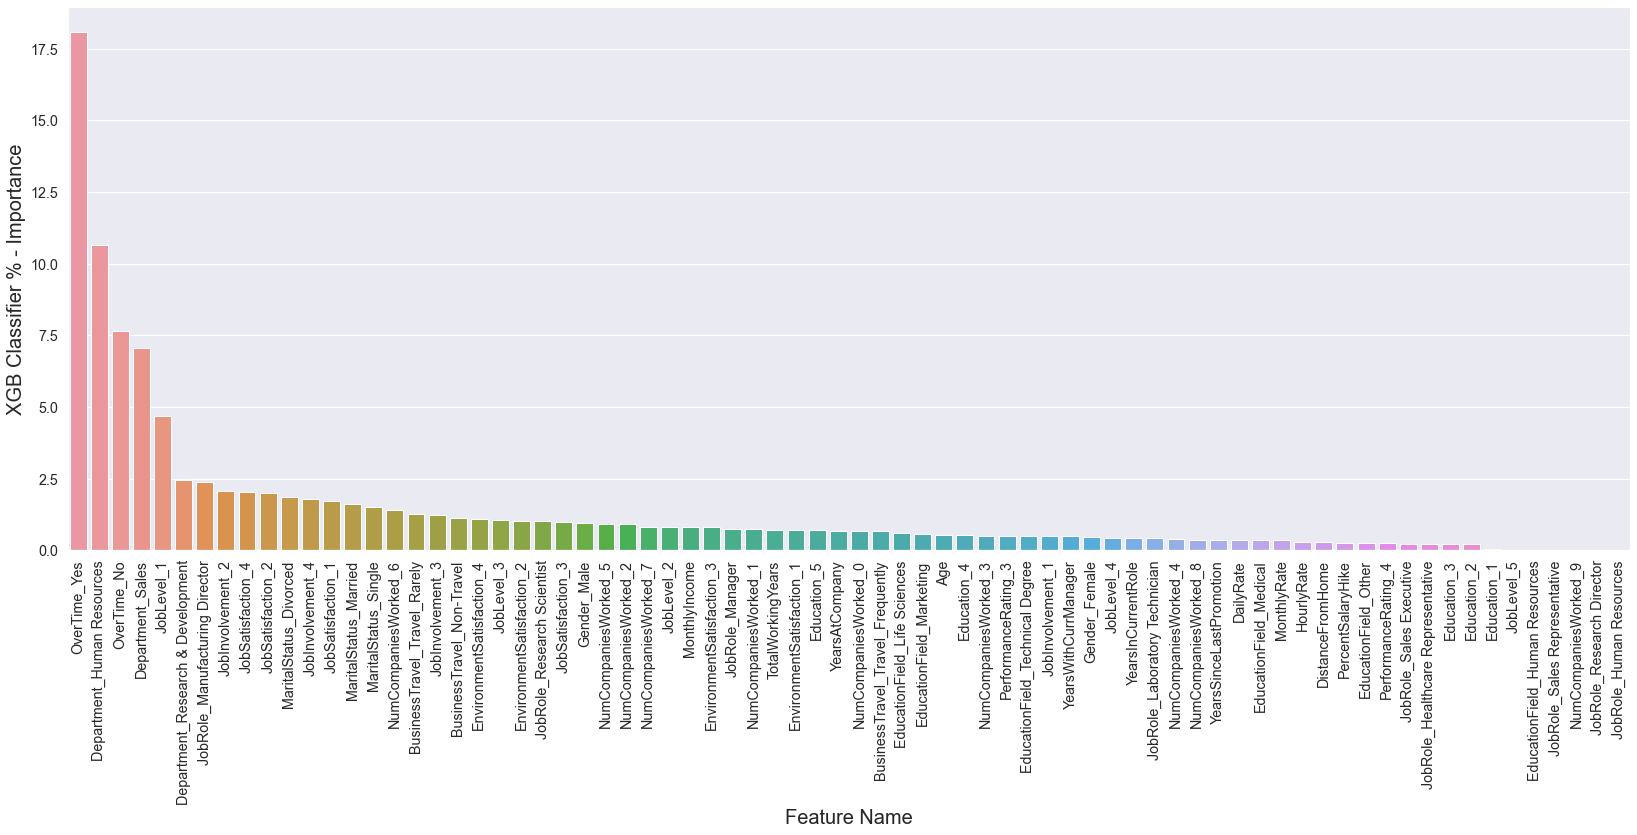

In [97]:
sns.reset_orig()
# 
df_ = pd.DataFrame(xgb_over_remove.feature_importances_ * 100, index=X_.columns, 
                  columns=["XGB %-importance"])
# 
df_.reset_index(inplace=True)
df_.sort_values('XGB %-importance', ascending=False, inplace=True)
# 
sns.set(rc = {'figure.figsize':(28,10)}, font_scale = 1.3)
plot=sns.barplot(data=df_,  x="index", y="XGB %-importance")
plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_xlabel("Feature Name", fontsize = 20)
plot.set_ylabel("XGB Classifier % - Importance", fontsize = 20);
# 
print('Total Features in the Dataset: ' + str(df_['index'].count()))

### Random Forest - RandomizedSearchCV

In [98]:
# 
from sklearn.model_selection import RandomizedSearchCV
# 
# RF initial param
params_ = {'n_jobs' : (-1),
           'random_state' : seed,
          }
# 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Weighted Random Forest
class_weight = ['balanced', 'balanced_subsample']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# 
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'class_weight' : class_weight,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              }

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.97      0.88      0.93       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'class_weight': 'balanced', 'bootstrap': False}


Mean Test  ROC AUC: 0.9639
Mean Train ROC AUC: 0.9793




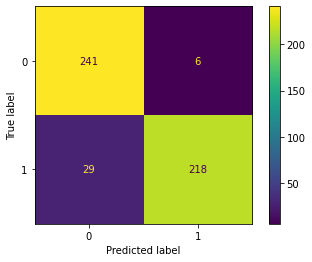

In [99]:
sns.reset_orig()
# 
rfc_CV = RandomForestClassifier(**params_)
#
rfc_random = RandomizedSearchCV(estimator = rfc_CV, param_distributions = random_grid, 
                                     n_iter = 100, cv = 5, verbose=0)
# 
rfc_random_remove = rfc_random.fit(X_train_over_remove, y_train_over_remove)
# 
y_pred_CV = rfc_random_remove.predict(X_test_over_remove)
# 
print(classification_report(y_test_over_remove, y_pred_CV))
print('\n')
print(rfc_random_remove.best_params_)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(rfc_random_remove, X_test_over_remove, y_test_over_remove, 
                              scoring='roc_auc', cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(rfc_random_remove, X_train_over_remove, y_train_over_remove, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')
cm = confusion_matrix(y_test_over_remove, y_pred_CV)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_random_remove.classes_)
disp.plot();
# 

Total Features in the Dataset: 74


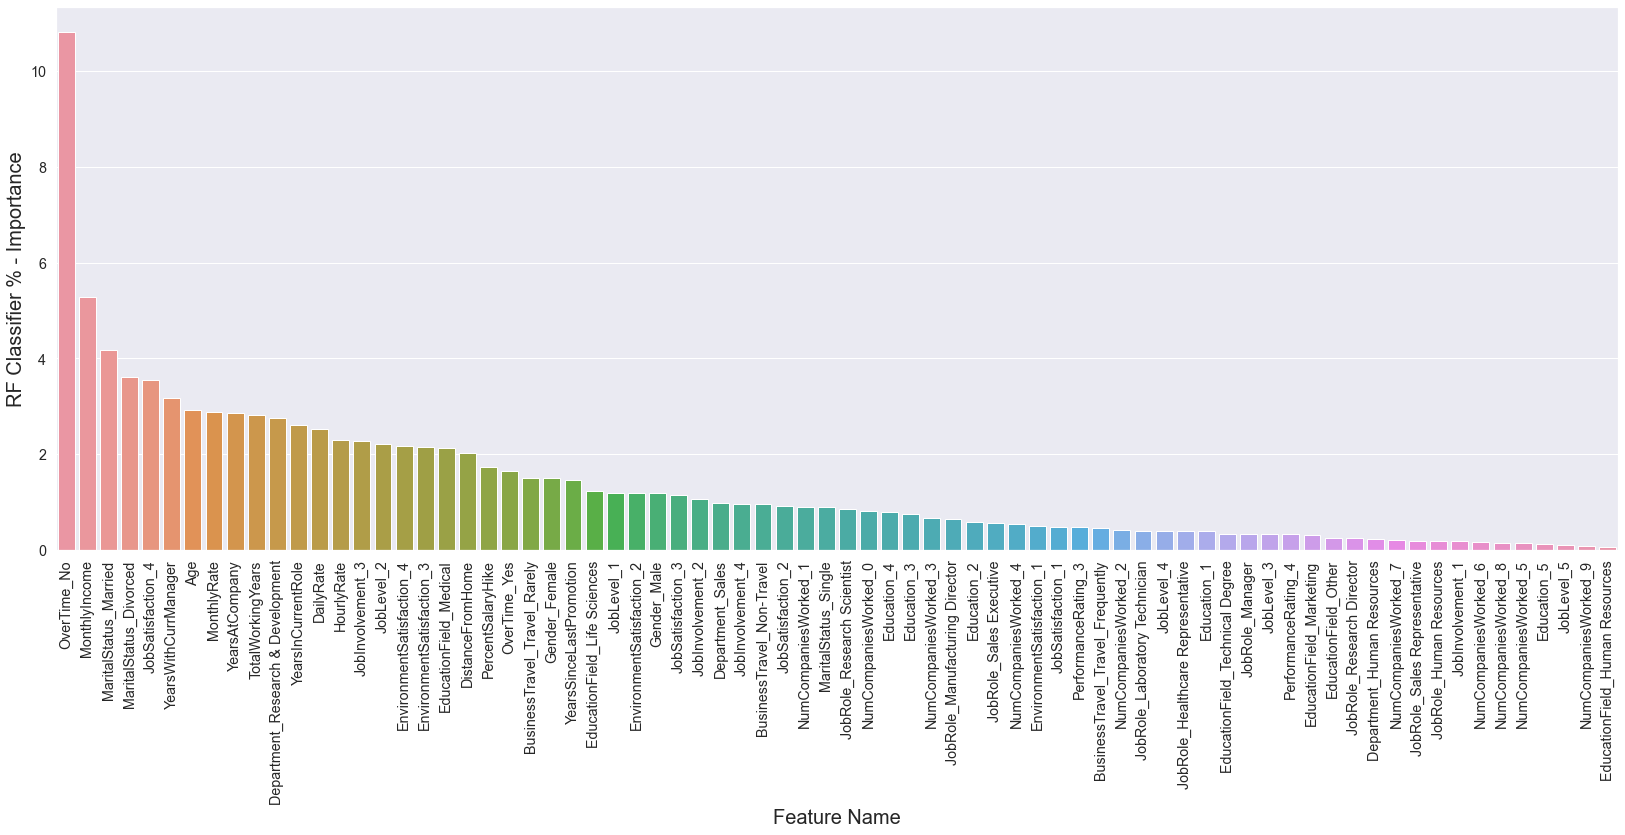

In [100]:
sns.reset_orig()
# 
df_ = pd.DataFrame(rfc_random_remove.best_estimator_.feature_importances_ * 100, index=X_.columns, 
                  columns=["RFC %-importance"])
# 
df_.reset_index(inplace=True)
df_.sort_values('RFC %-importance', ascending=False, inplace=True)
# 
sns.set(rc = {'figure.figsize':(28,10)}, font_scale = 1.3)
plot=sns.barplot(data=df_,  x="index", y="RFC %-importance")
plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_xlabel("Feature Name", fontsize = 20)
plot.set_ylabel("RF Classifier % - Importance", fontsize = 20);
# 
print('Total Features in the Dataset: ' + str(df_['index'].count()))

### XG Boost Classifier - RandomizedSearchCV

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.97      0.87      0.92       247

    accuracy                           0.92       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.92      0.92       494



{'subsample': 0.5, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.01, 'colsample_bytree': 0.6}


Mean Test  ROC AUC: 0.9550
Mean Train ROC AUC: 0.9682




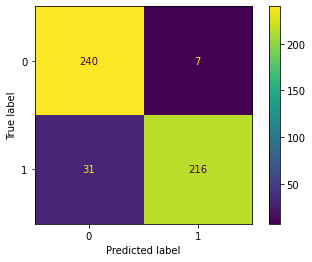

In [101]:
sns.reset_orig()
# 
params_xgb = {'objective' : 'binary:logistic',
              'use_label_encoder' : False,
              'n_jobs' : (-1),  
              'eval_metric' : 'auc',
              'random_state' : seed,
             }
# 
# Create XGB Classifier object
xgb_clf = XGBClassifier(**params_xgb)
# 
# Create parameter grid
parameters = {##"objective": ['binary:logistic', 'multi:softmax'],
              "learning_rate": [0.1, 0.05, 0.001],
              "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
              "max_depth": [2, 4, 7, 10],
              "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
              "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
              "reg_alpha": [0, 0.5, 1],
              "reg_lambda": [1, 1.5, 2, 3, 4.5],
              "min_child_weight": [1, 3, 5, 7],
              "n_estimators": [100, 250, 500, 1000],
             }
# 
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "roc_auc",
                             cv = 5, verbose = 0, random_state = seed)

# Fit the model
xgb_CV_remove = xgb_rscv.fit(X_train_over_remove, y_train_over_remove)
# 
y_pred_CV = xgb_CV_remove.predict(X_test_over_remove)
# 
print(classification_report(y_test_over_remove, y_pred_CV))
print('\n')
print(xgb_CV_remove.best_params_)
print('\n')
# 
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
# evaluate test model
scores_test = cross_val_score(xgb_CV_remove, X_test_over_remove, y_test_over_remove, 
                              scoring='roc_auc', cv=cv, n_jobs=-1)
# evaluate train model
scores_train = cross_val_score(xgb_CV_remove, X_train_over_remove, y_train_over_remove, 
                               scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Test  ROC AUC: %.4f' % mean(scores_test))
print('Mean Train ROC AUC: %.4f' % mean(scores_train))
print('\n')
cm = confusion_matrix(y_test_over_remove, y_pred_CV)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_CV_remove.classes_)
disp.plot();
# 

Total Features in the Dataset: 74


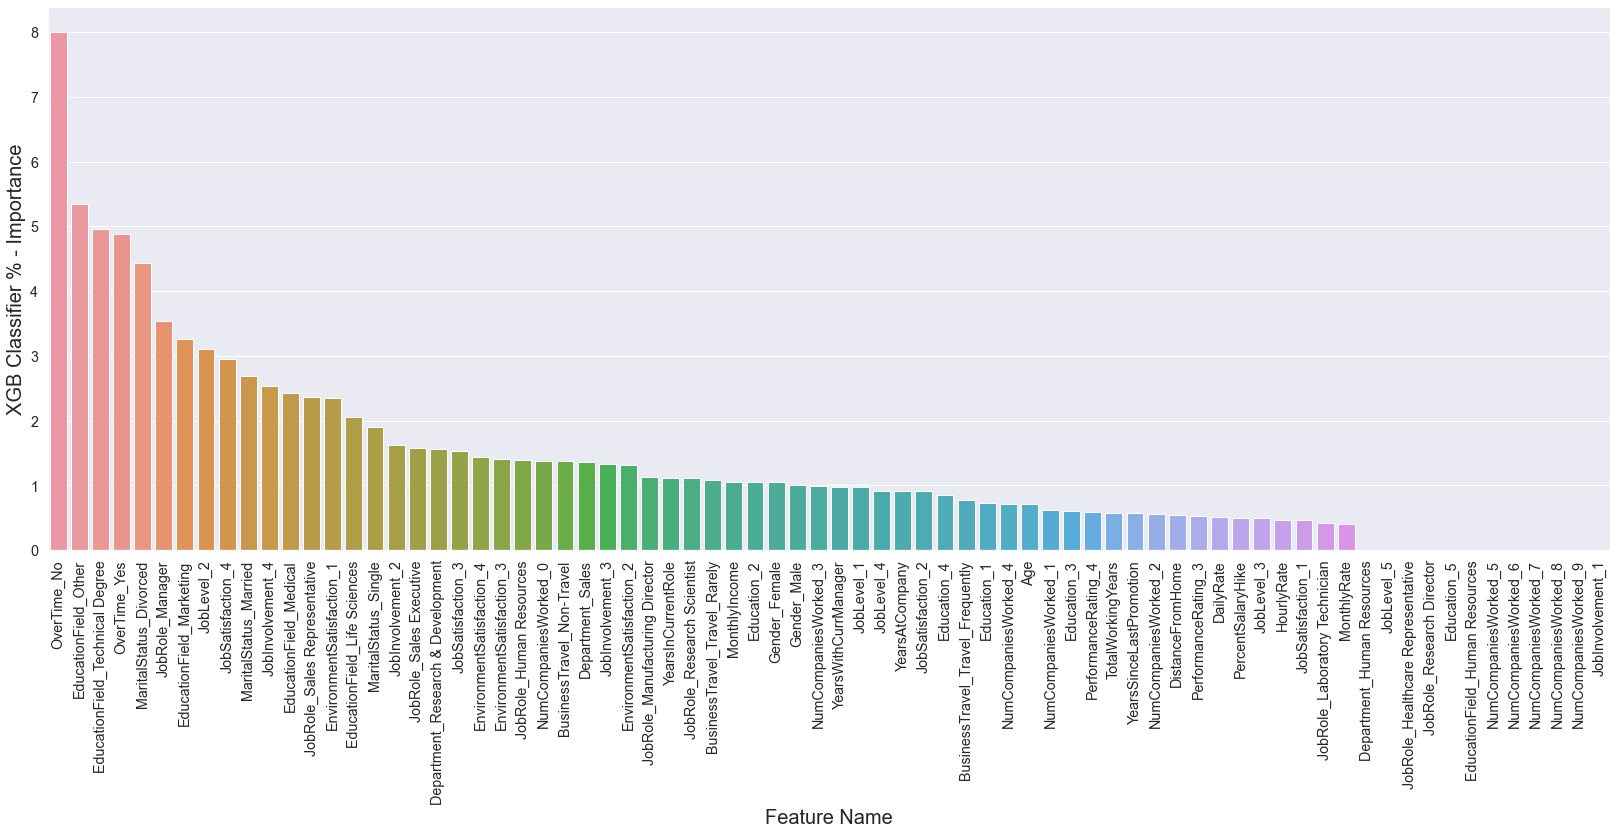

In [102]:
sns.reset_orig()
# 
df_ = pd.DataFrame(xgb_CV_remove.best_estimator_.feature_importances_ * 100, index=X_.columns, 
                  columns=["XGB %-importance"])
# 
df_.reset_index(inplace=True)
df_.sort_values('XGB %-importance', ascending=False, inplace=True)
# 
sns.set(rc = {'figure.figsize':(28,10)}, font_scale = 1.3)
plot=sns.barplot(data=df_,  x="index", y="XGB %-importance")
plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_xlabel("Feature Name", fontsize = 20)
plot.set_ylabel("XGB Classifier % - Importance", fontsize = 20);
# 
print('Total Features in the Dataset: ' + str(df_['index'].count()))